In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
from google.colab import files
files.upload()
df= pd.read_csv("weight-height.csv")

Saving weight-height.csv to weight-height (1).csv


In [0]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [0]:
x=df[['Height']].values
y_true=df[['Weight']].values

In [0]:
def line(x,w=0, b=0):
  return w*x+b


In [0]:
def mean_squared_error(y_true,y_pred):
  s=(y_true-y_pred)**2
  return np.sqrt(s.mean())

Text(0.5, 0, 'b')

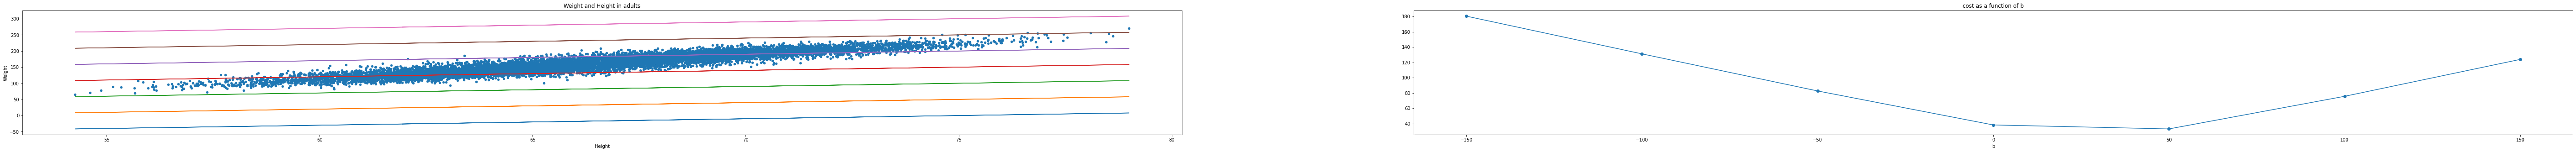

In [0]:
plt.figure(figsize=(100,5))
ax1=plt.subplot(121)
df.plot(kind='scatter', 
       x='Height',
       y='Weight',
       title='Weight and Height in adults', ax=ax1)
bs=np.array([-150,-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(x, w=2, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(x,y_pred)
    
ax2=plt.subplot(122)
plt.plot(bs, mses, 'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam

In [0]:
model= Sequential()
model.add(Dense(1, input_shape=(1,)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=0.8), 'mean_squared_error')


In [0]:
model.fit(x, y_true, epochs=40)

Train on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 1s 70us/sample - loss: 727.2367
Epoch 2/40
10000/10000 [==============================] - 0s 28us/sample - loss: 547.8398
Epoch 3/40
10000/10000 [==============================] - 0s 26us/sample - loss: 515.5834
Epoch 4/40
10000/10000 [==============================] - 0s 27us/sample - loss: 456.7083
Epoch 5/40
10000/10000 [==============================] - 0s 28us/sample - loss: 401.8096
Epoch 6/40
10000/10000 [==============================] - 0s 27us/sample - loss: 384.2761
Epoch 7/40
10000/10000 [==============================] - 0s 26us/sample - loss: 327.7886
Epoch 8/40
10000/10000 [==============================] - 0s 27us/sample - loss: 289.7143
Epoch 9/40
10000/10000 [==============================] - 0s 27us/sample - loss: 272.1728
Epoch 10/40
10000/10000 [==============================] - 0s 26us/sample - loss: 257.5490
Epoch 11/40
10000/10000 [==============================] - 0s 27us/sample - 

In [0]:
y_pred=model.predict(x)


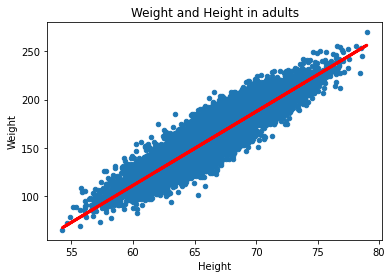

In [0]:
df.plot(kind='scatter',
       x='Height',
       y='Weight', title='Weight and Height in adults')
plt.plot(x, y_pred, color='red', linewidth=3)

In [0]:
w,b=model.get_weights()


In [0]:
w

array([[7.6625566]], dtype=float32)

In [0]:
b

array([-348.83197], dtype=float32)

In [0]:
model.predict([[200]])


array([[1183.6794]], dtype=float32)